# Dataset 1

In [ ]:
import pandas as pd
import numpy as np
nfl_data = pd.read_csv("NFL Play by Play 2009-2017 (v4).csv")

np.random.seed(0) # set seed of reproducibility


<ipython-input-14-2087ee805e49>:3: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  nfl_data = pd.read_csv("NFL Play by Play 2009-2017 (v4).csv")


In [ ]:
nfl_data.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [ ]:
# checking how many missing datapoints are the given dataset
missing_values_count= nfl_data.isnull().sum()

missing_values_count[1:10]

,0
GameID,0
Drive,0
qtr,0
down,61154
time,224
TimeUnder,0
TimeSecs,224
PlayTimeDiff,444
SideofField,528


In [ ]:
# checking how many total missing values are there in dataset
total_cells= np.product(nfl_data.shape)
missing_values= missing_values_count.sum()

# percentage of missing data
percent_missing= (missing_values/total_cells)*100
print (percent_missing)


27.66722370547874


In [ ]:
# drop misssing values with dropna
# remove all coloums with atleast one missing values
coloumns_with_na_dropped= nfl_data.dropna(axis=1)
coloumns_with_na_dropped.head()

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,AwayTeam,Timeout_Indicator,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009


In [ ]:
# checking how much data is lost dropping missing values coloumns
print("Coloumns in original dataset:%d\n"% nfl_data.shape[1])
print("Coloumns with na's dropped: %d\n"% coloumns_with_na_dropped.shape[1])


Coloumns in original dataset:102

Coloumns with na's dropped: 37



In [ ]:
# since there'a a lot of data missing we can fill missing values instead of dropping coloumns
# small subset of nfl dataset
subset_nfl_data= nfl_data.loc[:, 'EPA':'Season'].head()
subset_nfl_data

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [ ]:
# replacing all Nan with 0
subset_nfl_data.fillna(0)


,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


In [ ]:
# replace all NA's the value that comes directly after it in the same column,
# then replace all the remaining na's with 0
subset_nfl_data.fillna(method='bfill', axis=0).fillna(0)

<ipython-input-28-617457e8c201>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset_nfl_data.fillna(method='bfill', axis=0).fillna(0)


,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


# Dataset 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("used_cars_data.csv")

In [ ]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [ ]:
# check for duplicates
data.nunique()

,0
S.No.,7253
Name,2041
Location,11
Year,23
Kilometers_Driven,3660
Fuel_Type,5
Transmission,2
Owner_Type,4
Mileage,450
Engine,150


In [ ]:
# missing value calculation
data.isnull().sum()


,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46


In [ ]:
(data.isnull().sum()/(len(data)))*100

,0
S.No.,0.000000
Name,0.000000
Location,0.000000
Year,0.000000
Kilometers_Driven,0.000000
Fuel_Type,0.000000
Transmission,0.000000
Owner_Type,0.000000
Mileage,0.027575
Engine,0.634220


In [ ]:
# data reduction
data = data.drop(['S.No.'], axis= 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [ ]:
# feature engineering : process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling
# creating features
from datetime import date
date.today().year
data['Car_Age']=date.today().year-data['Year']
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,15
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,14
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,13
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,12


In [ ]:
data['Brand'] = data.Name.str.split().str.get(0)

In [ ]:
data['Model'] = data.Name.str.split().str.get(1) + data.Name.str.split().str.get(2)

In [ ]:
data[['Name','Brand','Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Volkswagen,PoloGT


In [ ]:
# data cleaning/ wrangling
print(data.Brand.unique())
print(data.Brand.nunique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']
33


In [ ]:
searchfor = ['Isuzu' ,'ISUZU','Mini','Land']
data[data.Brand.str.contains('|'.join(searchfor))].head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,27.00,11,Land,RoverRange
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,17.50,13,Land,RoverFreelander
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.6 kmpl,1998 CC,112 bhp,5.0,NaN,23.00,8,Mini,CountrymanCooper
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,55.76,7,Land,RoverRange
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82 kmpl,1998 CC,189.08 bhp,4.0,44.28 Lakh,35.67,8,Mini,CooperConvertible


In [ ]:
data["Brand"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper","Land":"Land Rover"}, inplace=True)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0
Car_Age,7253.0,11.634634,3.254421,6.00,9.0,11.00,14.00,29.0


In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,7207,386,74 bhp,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# seperating numericals and categorical variables for easy analysis
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price', 'Brand', 'Model'],
      dtype='object')
Numerical Variables:
['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Car_Age']


Year
Skew : -0.84


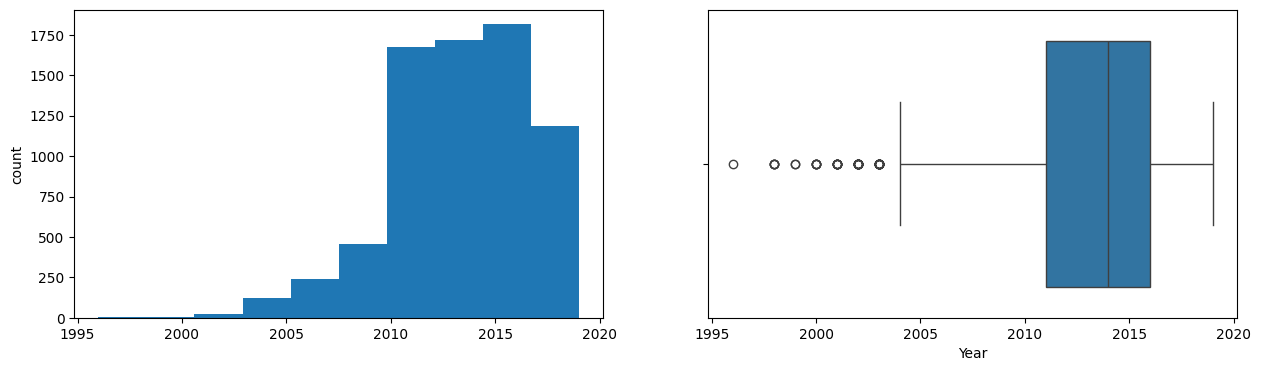

Kilometers_Driven
Skew : 61.58


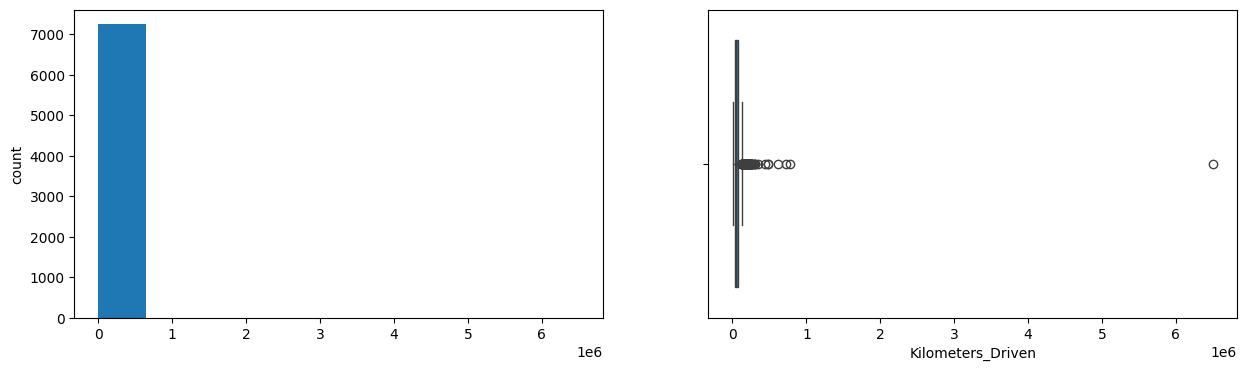

Seats
Skew : 1.9


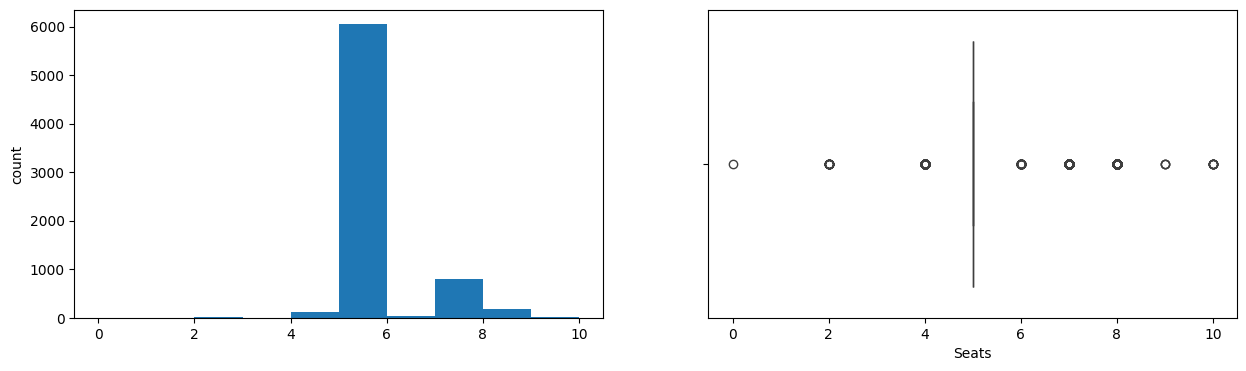

Price
Skew : 3.34


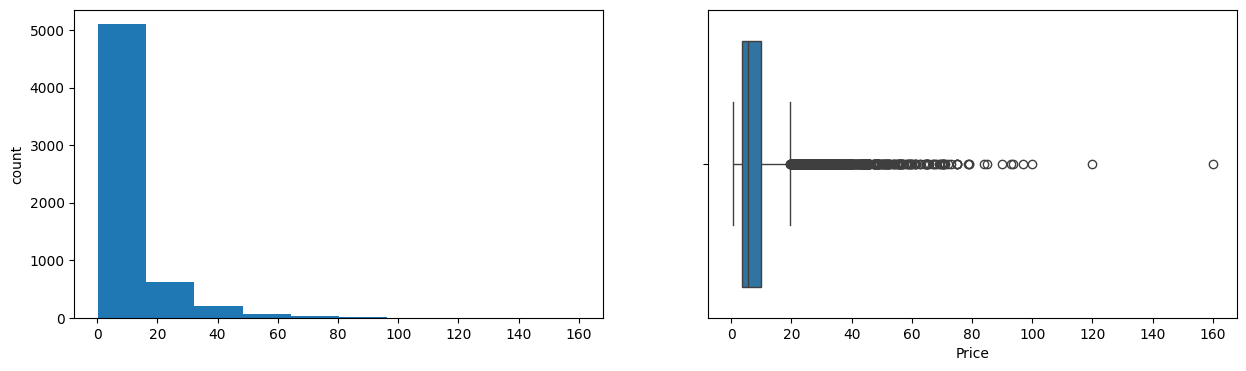

Car_Age
Skew : 0.84


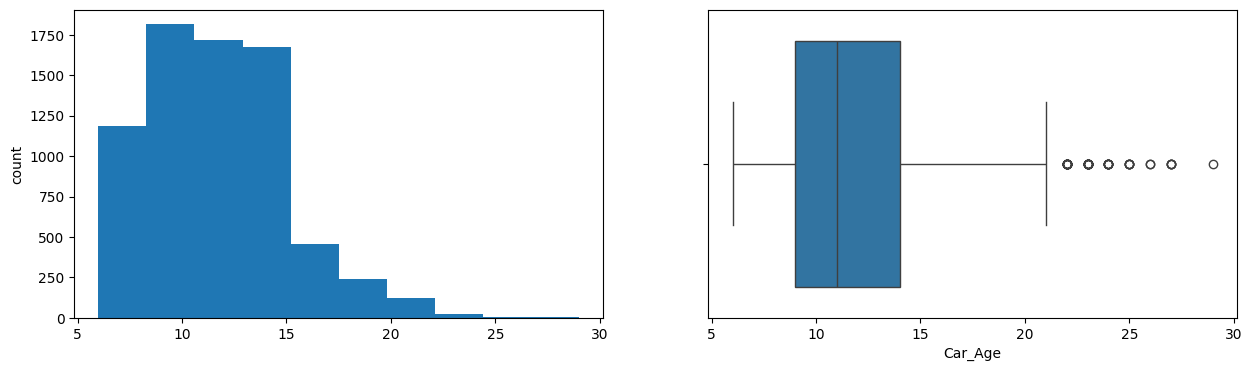

In [ ]:
# univariate analysis
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

In [ ]:
# impute missing values
data.loc[data["Mileage"]==0.0,'Mileage']=np.nan
data.Mileage.isnull().sum()

2

In [ ]:
data['Mileage'] = pd.to_numeric(data['Mileage'], errors='coerce')

data['Mileage'].fillna(value=np.mean(data['Mileage']), inplace=True)

# Dataset 3

In [ ]:
df = pd.read_csv('Indeed_tech jobs_chicago_2024.csv')


In [ ]:
print (df)
print(df.shape)


                           company  \
0                         Grainger   
1        The University of Chicago   
2        The University of Chicago   
3    CCC Information Services Inc.   
4        The University of Chicago   
..                             ...   
256           LatentView Analytics   
257                           CIBC   
258               Publicis Sapient   
259                 DataAnnotation   
260                 DataAnnotation   

                        companyInfo/companyDescription  \
0    Grainger is a leading broad line distributor w...   
1    The University of Chicago is an urban research...   
2    The University of Chicago is an urban research...   
3    At CCC, we’re all about connectedness - from o...   
4    The University of Chicago is an urban research...   
..                                                 ...   
256  LatentView Analytics Ltd. is one of the world’...   
257  CIBC is a leading and well-diversified North A...   
258  You want to do w

In [ ]:
df = df.drop_duplicates()



In [ ]:
print(df.columns) # prints columns' names


Index(['company', 'companyInfo/companyDescription', 'companyInfo/companyLogo',
       'companyInfo/indeedUrl', 'companyInfo/rating',
       'companyInfo/reviewCount', 'companyInfo/url', 'description',
       'descriptionHTML', 'externalApplyLink', 'id', 'isExpired', 'jobType',
       'jobType/0', 'jobType/1', 'jobType/2', 'location', 'positionName',
       'postedAt', 'postingDateParsed', 'rating', 'reviewsCount', 'salary',
       'scrapedAt', 'searchInput', 'url', 'urlInput'],
      dtype='object')


In [ ]:
columns_to_keep = ['company', 'companyInfo/rating', 'description', 'jobType/0', 'location', 'positionName', 'postingDateParsed', 'salary']

df = df[columns_to_keep]

In [ ]:


# key = existing name
# value = new name
renamed_columns = {'companyInfo/rating': 'Company Rating',
        'jobType/0': 'Job Type',
        'postingDateParsed': 'Data Posted'}

# call rename () method
df.rename(columns=renamed_columns,
          inplace=True)
# `inplace = true` modifies the existing data frame instead of creating a new one.


In [ ]:
import re

def clean_salary_column(df, column_name='salary'):
    def process_salary(salary):
        # Convert salary to string
        salary = str(salary)
        # Remove all non-numeric characters except for dots and hyphens
        salary = re.sub(r'[^\d.-]', '', salary)
        # Calculate the average if there's a range, else convert to float
        if '-' in salary:
            salary = sum(map(float, salary.split('-'))) / 2
        else:
            salary = float(salary) if salary != '' else 0
        # Adjust values less than 100
        return salary if salary > 100 else salary * 2000

    # Apply the processing function to the salary column
    df[column_name] = df[column_name].apply(process_salary)

    # Replace 0.0 float values with None for future operations
    df[column_name] = df[column_name].apply(lambda x: None if x == 0.0 else x)


    return df



In [ ]:
#Replacing missing values
df['Company Rating'].fillna("N/A", inplace=True)
df['Job Type'].fillna("N/A", inplace=True)



In [ ]:
# cleaning salary coloumns
print("before deleting null values: ", df.shape)

# Replacing 0.0 float values with None
df['salary'] = df['salary'].apply(lambda x: None if x == 0.0 else x)
df = df.dropna(subset=['salary'])

# to find number of rows removed
print("after deleting null values: ", df.shape)


before deleting null values:  (89, 8)
after deleting null values:  (89, 8)


In [ ]:
# cleaning text using apply function
df['Data Posted'] = df['Data Posted'].astype(str)

df['Data Posted'] = df['Data Posted'].apply(lambda x: x.split('T')[0])



In [ ]:
# text processing with map()
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)
print(df)

                           company Company Rating  \
3    CCC Information Services Inc.            3.7   
5                      Press Ganey            3.5   
14                     Jellyvision            3.3   
20                          BMO US            3.5   
21                             IBM            3.9   
..                             ...            ...   
252       Adtalem Global Education            3.1   
257                           CIBC            3.8   
258               Publicis Sapient            3.9   
259                 DataAnnotation            4.3   
260                 DataAnnotation            4.3   

                                           description   Job Type  \
3    Salary range is:\n  $86,732.00 - $120,000.00\n...  Full-time   
5    Company Description\n  Looking to level up you...  Full-time   
14   Manager, Business Intelligence \n  Who we are ...        N/A   
20   320 S Canal Street Chicago Illinois,60606 \n \...  Full-time   
21   Introduction\

In [ ]:
# managing outliers
def clean_salary(s):
    import re

    # Extract numbers using regex
    numbers = re.findall(r'\d{1,3}(?:,\d{3})*(?:\.\d+)?', s)

    # Convert to float after removing commas
    numbers = [float(num.replace(',', '')) for num in numbers]

    if len(numbers) == 2:
        return np.mean(numbers)  # If a range, take the average
    elif len(numbers) == 1:
        return numbers[0]  # If a single number, use it
    else:
        return np.nan  # If no number, return NaN

# Apply cleaning function to salary column
df['salary'] = df['salary'].apply(clean_salary)


mean_salary = df['salary'].mean()
std_salary = df['salary'].std()
cutoff = std_salary * 3
df['Outlier'] = df['salary'].apply(lambda x: abs(x - mean_salary) > cutoff)

outliers = df[df['Outlier']]
print(outliers)


Empty DataFrame
Columns: [company, Company Rating, description, Job Type, location, positionName, Data Posted, salary, Outlier]
Index: []


In [ ]:
# Identifying indices of rows with outliers
outlier_indices = df[df['Outlier']].index

# Removing these rows from the DataFrame
df.drop(index=outlier_indices, inplace=True)

# Removing the 'Outlier' column as it's no longer needed
df.drop(columns=['Outlier'], inplace=True)

In [ ]:
# merging dataframes
import pandas as pd

# Sample data
data1 = {'ID': [1, 2, 3], 'Name': ['Rose', 'Nick', 'Leo']}
data2 = {'ID': [1, 2, 4], 'Age': [25, 30, 35]}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Merging DataFrames
merged_df = pd.merge(df1, df2, on='ID')
print(merged_df)


   ID  Name  Age
0   1  Rose   25
1   2  Nick   30


In [ ]:
# concatenatingn dataframes
import pandas as pd

# Sample data
data1 = {'ID': [1, 2, 3], 'Name': ['Rose', 'Nick', 'Leo']}
data2 = {'ID': [4, 5, 6], 'Name': ['Eric', 'Mark', 'Adam']}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Concatenate DataFrames vertically
concatenated_df_vertical = pd.concat([df1, df2], ignore_index=True)


In [ ]:
# hoirizontal concatenation
import pandas as pd

# Sample data
data1 = {'ID': [1, 2, 3], 'Name': ['Rose', 'Nick', 'Leo']}
data2 = {'Age': [25, 30, 35]}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Concatenate DataFrames horizontally
concatenated_df_horizontal = pd.concat([df1, df2], axis=1)